In [1]:
for n_pow in range(1, 5):
    n = 10**n_pow // 2
    for split in [0.1, 0.5]:
        a1 = int(split * n)
        b1 = int((1-split) * n)
        a2 = int((1-split) * n)
        b2 = int(split * n)


In [6]:
from scipy.stats import beta
from scipy.special import beta as beta_func
from scipy.special import betaln
import numpy as np

In [38]:
%%timeit
x = [1,2,3] * 100
x = [0] + x
x = x[:-1]

1.86 µs ± 50.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
%%timeit
x = [1,2,3] * 100
x.insert(0, 0)
x = x[:-1]

1.58 µs ± 7.56 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
%%timeit
x = [1,2,3] * 100
x.append(0)
x.pop(0)

948 ns ± 7.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [70]:
%%timeit
x = [1,2,3] * 100
x = x[1:] + [0]

1.88 µs ± 37 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [71]:
%%timeit
x = [1,2,3] * 100
x = [0] + x[:-1]

1.92 µs ± 42.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [141]:

"""
The Tornado Framework medical Triage Edition
By Ali Pesaranghader
University of Ottawa, Ontario, Canada
E-mail: apesaran -at- uottawa -dot- ca / alipsgh -at- gmail -dot- com
---
*** The Calibrated Drift Detection Method (CDDM) Implementation ***
Paper: None
Published in: None
URL: None
"""

import numpy as np

import warnings

from dictionary.tornado_dictionary import TornadoDic
from drift_detection.detector import SuperDetector


class CDDM(SuperDetector):
    """The Calibrated Drift Detection Method (CDDM) class."""

    DETECTOR_NAME = TornadoDic.CDDM

    def __init__(self, drift_confidence=0.1, warning_confidence=0.2, n=100):

        super().__init__()

        # Parameters
        self.warning_threshold = warning_confidence / n
        self.drift_threshold = drift_confidence / n
        self.window_size = n

        # Data storage
        self.window = []
        self.n_samples = 0

        self.total = 0

    def get_x0(self, pr, conf):
        return np.abs(pr-conf)

    def run(self, pr, confidence):

        self.n_samples += 1 # don't actually need this

        x0 = self.get_x0(pr, confidence)

        window = self.window = [x0] + self.window

        if len(self.window) > self.window_size:
            window = self.window = self.window[:-1]

        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            probs = np.exp( - np.cumsum(window)**2 / 2 / (1+np.arange(len(self.window))) )
#             probs = 2*np.exp( - np.sum(window)**2 / 2 / len(self.window) )

        pr_drift = min(probs)
#         pr_drift = probs

        if pr_drift < self.drift_threshold:
            warning_status = False
            drift_status = True
        elif pr_drift < self.warning_threshold:
            warning_status = True
            drift_status = False
        else:
            warning_status = False
            drift_status = False

        # self.total += x0
        # mean = self.total / self.n_samples
        #
        # print(pr_drift, warning_status, drift_status, sum(window), mean)

        return warning_status, drift_status

    def reset(self):
        super().reset()
        self.window =  []

    def get_settings(self):
        return [str(self.drift_confidence) + "." + str(self.warning_confidence) + "." + str(self.window_size),
                "$\delta_d$:" + str(self.drift_confidence).upper() + ", " +
                "$\delta_w$:" + str(self.warning_confidence).upper() + ", " +
                "$N$:" + str(self.window_size).upper()]


In [45]:
%%timeit
prs = [0] * 200
confs = [0] * 100 + [0.1] * 100

cddm = CDDM()
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
    if warn or drift:
        print(i, warn, drift)

8.18 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
%%timeit
prs = [0] * 200
confs = [0] * 100 + [0.1] * 100

cddm = CDDM2()
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
    if warn or drift:
        print(i, warn, drift)

4.68 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
%%timeit
prs = [0] * 2000
confs = [0] * 1000 + [0.1] * 1000

cddm = CDDM()
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
    if warn or drift:
        print(i, warn, drift)

89.4 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%%timeit
prs = [0] * 2000
confs = [0] * 1000 + [0.1] * 1000

cddm = CDDM2()
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
    if warn or drift:
        print(i, warn, drift)

51.2 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
%%timeit
prs = [0] * 2000
confs = [0] * 1000 + [0.2] * 1000

cddm = CDDM2()
print_ = True
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
    if print_ and (warn or drift):
        print(i, warn, drift)
        print_ = False

1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 True False
1239 Tru

In [92]:
%%timeit
prs = [0] * 2000
confs = [0] * 1000 + [0.2] * 1000

cddm = CDDM2()
print_ = True
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
    if print_ and (warn or drift):
        print(i, warn, drift)
        print_ = False

979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True False
979 True F

In [139]:

"""
The Tornado Framework medical Triage Edition
By Ali Pesaranghader
University of Ottawa, Ontario, Canada
E-mail: apesaran -at- uottawa -dot- ca / alipsgh -at- gmail -dot- com
---
*** The Calibrated Drift Detection Method (CDDM) Implementation ***
Paper: None
Published in: None
URL: None
"""

import numpy as np

import warnings

from dictionary.tornado_dictionary import TornadoDic
from drift_detection.detector import SuperDetector


class CDDM2(SuperDetector):
    """The Calibrated Drift Detection Method (CDDM) class."""

    DETECTOR_NAME = TornadoDic.CDDM

    def __init__(self, drift_confidence=0.1, warning_confidence=0.2, n=200):

        super().__init__()

        # Parameters
        self.warning_threshold = warning_confidence
        self.drift_threshold = drift_confidence
        self.window_size = n

        # Data storage
        self.window = []
        self.n_samples = 0
        self.total = 0

    def run(self, pr, confidence):

        self.window.append(pr-conf)
        self.total += pr-conf
        if len(self.window) > self.window_size:
            self.total -= self.window.pop(0)

        self.n_samples += 1
        div = min(self.n_samples, self.window_size)
        pr_drift = 2*np.exp( - self.total**2 / 2 / div )
        
        warning_status, drift_status = False, False
        if pr_drift < self.drift_threshold:
            drift_status = True
        elif pr_drift < self.warning_threshold:
            warning_status = True

        return warning_status, drift_status

    def reset(self):
        super().reset()
        self.window =  []
        self.n_samples = 0
        self.total = 0

    def get_settings(self):
        return [str(self.drift_confidence) + "." + str(self.warning_confidence) + "." + str(self.window_size),
                "$\delta_d$:" + str(self.drift_confidence).upper() + ", " +
                "$\delta_w$:" + str(self.warning_confidence).upper() + ", " +
                "$N$:" + str(self.window_size).upper()]


In [140]:
%%timeit
prs = ([1]*9+[0]) * 100 + ([1]*7+[0]*3) * 100
confs = [0.9] * 2000

cddm = CDDM2()
print_ = True
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
#     if print_ and (warn or drift):
#         print(i, warn, drift, cddm.window)
#         print_ = False

5.49 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [142]:
%%timeit
prs = ([1]*9+[0]) * 100 + ([1]*7+[0]*3) * 100
confs = [0.9] * 2000

cddm = CDDM()
print_ = True
for i, (pr, conf) in enumerate(zip(prs, confs)):
    warn, drift = cddm.run(pr, conf)
#     if print_ and (warn or drift):
#         print(i, warn, drift, cddm.window)
#         print_ = False

94.1 ms ± 732 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:

"""
The Tornado Framework medical Triage Edition
By Ali Pesaranghader
University of Ottawa, Ontario, Canada
E-mail: apesaran -at- uottawa -dot- ca / alipsgh -at- gmail -dot- com
---
*** The Calibrated Drift Detection Method (CDDM) Implementation ***
Paper: None
Published in: None
URL: None
"""

import numpy as np

import warnings

from dictionary.tornado_dictionary import TornadoDic
from drift_detection.detector import SuperDetector


class CDDM2(SuperDetector):
    """The Calibrated Drift Detection Method (CDDM) class."""

    DETECTOR_NAME = TornadoDic.CDDM

    def __init__(self, drift_confidence=0.1, warning_confidence=0.2, n=500):

        super().__init__()

        # Parameters
        self.warning_threshold = warning_confidence
        self.drift_threshold = drift_confidence
        self.window_size = n

        # Data storage
        self.window = []
        self.n_samples = 0

        self.total = 0

    def run(self, pr, confidence):

#         self.n_samples += 1 # don't actually need this

#         x0 = pr-conf
    
        self.window.append(pr-conf)
#         sub = 0
        if len(self.window) > self.window_size:
            self.total -= self.window.pop(0)

        pr_drift = 2*np.exp( - self.total**2 / 2 / self.window_size )


        warning_status, drift_status = False, False
        if pr_drift < self.drift_threshold:
            drift_status = True
        elif pr_drift < self.warning_threshold:
            warning_status = True

        # self.total += x0
        # mean = self.total / self.n_samples
        #
        # print(pr_drift, warning_status, drift_status, sum(window), mean)

        return warning_status, drift_status

    def reset(self):
        super().reset()
        self.window =  []

    def get_settings(self):
        return [str(self.drift_confidence) + "." + str(self.warning_confidence) + "." + str(self.window_size),
                "$\delta_d$:" + str(self.drift_confidence).upper() + ", " +
                "$\delta_w$:" + str(self.warning_confidence).upper() + ", " +
                "$N$:" + str(self.window_size).upper()]


In [72]:
"""
The Tornado Framework
By Ali Pesaranghader
University of Ottawa, Ontario, Canada
E-mail: apesaran -at- uottawa -dot- ca / alipsgh -at- gmail -dot- com
---
*** The Hoeffding's Bound based Drift Detection Method - A_test Scheme Implementation (HDDM.A.test) ***
Paper: Frías-Blanco, Isvani, et al. "Online and non-parametric drift detection methods based on Hoeffding’s bounds."
Published in: IEEE Transactions on Knowledge and Data Engineering 27.3 (2015): 810-823.
URL: http://ieeexplore.ieee.org/abstract/document/6871418/
"""

import math

from dictionary.tornado_dictionary import TornadoDic
from drift_detection.detector import SuperDetector


class HDDM_A_test(SuperDetector):
    """The Hoeffding's Bound based Drift Detection Method - A_test (HDDM.A.test) class."""

    DETECTOR_NAME = TornadoDic.HDDM_A_test

    def __init__(self, drift_confidence=0.001, warning_confidence=0.005, test_type='two-sided'):

        super().__init__()

        self.drift_confidence = drift_confidence
        self.warning_confidence = warning_confidence
        self.test_type = test_type

        self.n_min = 0
        self.c_min = 0
        self.total_n = 0
        self.total_c = 0
        self.n_max = 0
        self.c_max = 0

    def run(self, pr):

        pr = 1 if pr is False else 0

        warning_status = False
        drift_status = False

        # 1. UPDATING STATS
        self.total_n += 1
        self.total_c += pr

        if self.n_min == 0:
            self.n_min = self.total_n
            self.c_min = self.total_c

        if self.n_max == 0:
            self.n_max = self.total_n
            self.c_max = self.total_c

        cota = math.sqrt((1.0 / (2 * self.n_min)) * math.log(1.0 / self.drift_confidence, math.e))
        cota1 = math.sqrt((1.0 / (2 * self.total_n)) * math.log(1.0 / self.drift_confidence, math.e))
        if self.c_min / self.n_min + cota >= self.total_c / self.total_n + cota1:
            self.c_min = self.total_c
            self.n_min = self.total_n

        cota = math.sqrt((1.0 / (2 * self.n_max)) * math.log(1.0 / self.drift_confidence, math.e))
        if self.c_max / self.n_max - cota <= self.total_c / self.total_n - cota1:
            self.c_max = self.total_c
            self.n_max = self.total_n

        if self.mean_incr(self.drift_confidence):
            self.n_min = self.n_max = self.total_n = 0
            self.c_min = self.c_max = self.total_c = 0
            drift_status = True
            warning_status = False
        elif self.mean_incr(self.warning_confidence):
            drift_status = False
            warning_status = True
        else:
            drift_status = False
            warning_status = False

        # 2. UPDATING WARNING AND DRIFT STATUSES
        if self.test_type == 'two-sided' and self.mean_decr():
            self.n_min = self.n_max = self.total_n = 0
            self.c_min = self.c_max = self.total_c = 0

        return warning_status, drift_status

    def mean_incr(self, confidence_level):
        if self.n_min == self.total_n:
            return False
        m = (self.total_n - self.n_min) / self.n_min * (1.0 / self.total_n)
        cota = math.sqrt((m / 2) * math.log(2.0 / confidence_level, math.e))
        return self.total_c / self.total_n - self.c_min / self.n_min >= cota

    def mean_decr(self):
        if self.n_max == self.total_n:
            return False
        m = (self.total_n - self.n_max) / self.n_max * (1.0 / self.total_n)
        cota = math.sqrt((m / 2) * math.log(2.0 / self.drift_confidence, math.e))
        return self.c_max / self.n_max - self.total_c / self.total_n >= cota

    def reset(self):
        super().reset()
        self.n_min = 0
        self.c_min = 0
        self.total_n = 0
        self.total_c = 0
        self.n_max = 0
        self.c_max = 0

    def get_settings(self):
        return [str(self.drift_confidence) + "." + str(self.warning_confidence) + "." + str(self.test_type),
                "$\delta_d$:" + str(self.drift_confidence).upper() + ", " +
                "$\delta_w$:" + str(self.warning_confidence).upper()]


In [74]:
%%timeit
prs = [0, 0, 1] * 300 + [1, 1, 0] * 300

cddm = HDDM_A_test()
print_ = True
for i, pr in enumerate(prs):
    warn, drift = cddm.run(pr)
    if print_ and (warn or drift):
        print(i, warn, drift)
        print_ = False

6.32 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# BDDM testing

In [11]:
import matplotlib.pyplot as plt

In [147]:
class BDDM():
    def __init__(self, drift_confidence=0.001, warning_confidence=0.005, drift_rate=0.001, n=10000):
        self.drift_confidence = drift_confidence
        self.warning_confidence = warning_confidence
        self.drift_rate = drift_rate
        self.win_len = n

        self.a = [] # all the successful trials
        self.b = [] # all the unsuccessful trials
        self.N = 0 # total number of trials

    def log_prior(self, t):
        if t==0:
            return np.log(1-self.drift_rate)*self.N
        else:
            return np.log(1-self.drift_rate)*(t-1) + np.log(self.drift_rate)

    def log_likelihood(self, drift_point):
        a1 = sum(self.a[:drift_point])
        b1 = sum(self.b[:drift_point])
        a2 = sum(self.a[drift_point:])
        b2 = sum(self.b[drift_point:])
        return betaln(a1+1, b1+1) + betaln(a2+1, b2+1)

    def run(self, pr):

        self.a.append(pr)
        self.b.append(1-pr)
        self.N += 1

        # if we have exceeded the window length, then combine the first two items in the window
        if self.win_len and len(self.a) > self.win_len:
            self.a = [sum(self.a[: 2])] + self.a[2: ]
            self.b = [sum(self.b[: 2])] + self.b[2: ]

        log_posteriors = []
        for k in range(min(self.N, self.win_len)):
            log_posteriors.append( self.log_likelihood(k) + self.log_prior(k) )
        log_posteriors -= max(log_posteriors)
        posteriors = np.exp(log_posteriors)


        return posteriors

CPU times: user 1min 2s, sys: 143 ms, total: 1min 3s
Wall time: 1min 3s


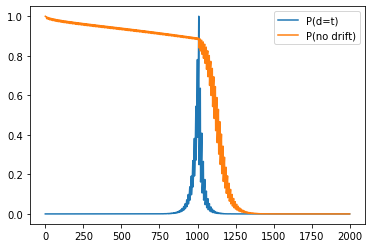

In [34]:
%%time
prs = (([0] * 9) + [1]) * 100 + (([0] * 8) + [1] * 2) * 100

bddm = BDDM()
posts = None
p_drifts = []
for pr in prs:
    posts = bddm.run(pr)
    p_drifts.append( posts[0] / sum(posts) )
    
plt.plot(np.arange(len(posts)), posts, label='P(d=t)')
plt.plot(np.arange(len(posts)), p_drifts, label='P(no drift)')
plt.legend()

CPU times: user 1min 3s, sys: 96.6 ms, total: 1min 3s
Wall time: 1min 3s


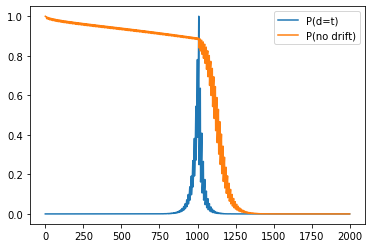

In [149]:
%%time
prs = (([0] * 9) + [1]) * 100 + (([0] * 8) + [1] * 2) * 100

bddm = BDDM()
posts = None
p_drifts = []
for pr in prs:
    posts = bddm.run(pr)
    p_drifts.append( posts[0] / sum(posts) )
    
plt.plot(np.arange(len(posts)), posts, label='P(d=t)')
plt.plot(np.arange(len(posts)), p_drifts, label='P(no drift)')
plt.legend()

CPU times: user 35.6 s, sys: 33.8 ms, total: 35.6 s
Wall time: 35.6 s


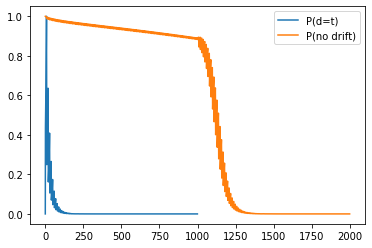

In [151]:
%%time
prs = (([0] * 9) + [1]) * 100 + (([0] * 8) + [1] * 2) * 100

bddm = BDDM(n=1000)
posts = None
p_drifts = []
for pr in prs:
    posts = bddm.run(pr)
    p_drifts.append( posts[0] / sum(posts) )
    
plt.plot(np.arange(len(posts)), posts, label='P(d=t)')
plt.plot(np.arange(len(p_drifts)), p_drifts, label='P(no drift)')
plt.legend()

CPU times: user 7.13 s, sys: 14.5 ms, total: 7.14 s
Wall time: 7.15 s


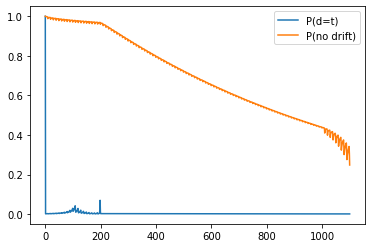

In [144]:
%%time
prs = (([0] * 9) + [1]) * 100 + (([0] * 8) + [1] * 2) * 10

bddm = BDDM(n=200)
posts = None
p_drifts = []
for pr in prs:
    posts = bddm.run(pr)
    p_drifts.append( posts[0] / sum(posts) )
    
plt.plot(np.arange(len(posts)), posts, label='P(d=t)')
plt.plot(np.arange(len(posts)), p_drifts, label='P(no drift)')
plt.legend()

In [23]:
# Try not doing the calculations in log space

class BDDM2():
    def __init__(self, drift_confidence=0.001, warning_confidence=0.005, drift_rate=0.001, n=10000):
        self.drift_confidence = drift_confidence
        self.warning_confidence = warning_confidence
        self.drift_rate = drift_rate
        self.win_len = n

        self.a = [] # all the successful trials
        self.b = [] # all the unsuccessful trials
        self.N = 0 # total number of trials

    def prior(self, t):
        if t==0:
            return 1-self.drift_rate**self.N
        else:
            return (1-self.drift_rate)**(t-1) * self.drift_rate

    def likelihood(self, drift_point):
        a1 = sum(self.a[:drift_point])
        b1 = sum(self.b[:drift_point])
        a2 = sum(self.a[drift_point:])
        b2 = sum(self.b[drift_point:])
        return beta_func(a1+1, b1+1) * beta_func(a2+1, b2+1)

    def run(self, pr):

        self.a.append(pr)
        self.b.append(1-pr)
        self.N += 1

        # if we have exceeded the window length, then combine the first two items in the window
        if self.win_len and len(self.a) > self.win_len:
            self.a = [sum(self.a[: 2])] + self.a[2: ]
            self.b = [sum(self.b[: 2])] + self.b[2: ]

        log_posteriors = []
        for k in range(self.N):
            log_posteriors.append( self.likelihood(k) * self.prior(k) )
        log_posteriors /= max(log_posteriors)
        posteriors = log_posteriors


        return posteriors

<ipython-input-23-98007aa01310>:39: RuntimeWarning: invalid value encountered in true_divide
  log_posteriors /= max(log_posteriors)


CPU times: user 40.6 s, sys: 35.6 ms, total: 40.6 s
Wall time: 40.6 s


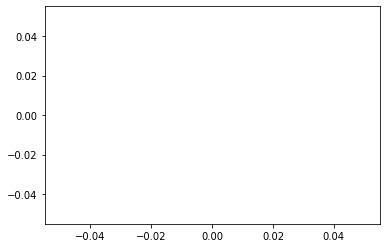

In [24]:
%%time
prs = [0, 0, 1] * 300 + [1, 1, 0] * 300

bddm2 = BDDM2()
posts = None
p_drifts = []
for pr in prs:
    posts = bddm2.run(pr)
    p_drifts.append( posts[0] / sum(posts) )
plt.plot(np.arange(len(posts)), posts)

In [25]:
posts

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:

N = 2000
drift_rate = 0.001

def log_prior(a, b):
    N = a+b
    if t==0:
        return np.log(1-drift_rate)*N
    else:
        return np.log(1-drift_rate)*(t-1) + np.log(drift_rate)

def prior(t, N):
    if t==0:
        return (1-drift_rate)**N
    else:
        return (1-drift_rate)**(t-1) * drift_rate
    
def log_likelihood(a1, b1, a2, b2):
    return betaln(a1+1, b1+1) + betaln(a2+1, b2+1)

def posterior(a1, b1, a2, b2):
    log_posteriors = []
    for k in range(self.N):
        log_posteriors.append( self.log_likelihood(k) + self.log_prior(k) )
    log_posteriors -= max(log_posteriors)
    posteriors = np.exp(log_posteriors)


    pr_stable = posteriors[0] / sum(posteriors)
